In [1]:
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, size, avg, count, col,sum, explode
import json

env = "production"
#s3://mist-aggregated-stats-production/aggregated-stats/top_1_time_epoch_by_site_ap_ap2_band/dt=2020-03-14/hr=16/part-00000-76298f84-5414-49c5-88f6-a981ff06d94d-c000.csv .

s3_bucket = "s3://mist-aggregated-stats-{env}/aggregated-stats/".format(env=env)
date_day = "2020-08-11"
hr = '*'

ap_neighbors_path = "top_1_time_epoch_by_site_ap_ap2_band/dt={day}/hr={hr}/*.csv".format(env=env, day=date_day, hr=hr)

ap_neighbors_path = s3_bucket + ap_neighbors_path
print(ap_neighbors_path)



# date_day = "2020-08-11"
# hr = '*'

s3_coverage_bucket = "s3://mist-secorapp-{env}/sle-coverage-anomaly/sle-coverage-anomaly-{env}/".format(env=env)
s3_coverage_path = s3_coverage_bucket + "dt={day}/hr={hr}/*.seq".format(day=date_day, hr=hr)
print(s3_coverage_path)


s3_sticky_bucket = "s3://mist-secorapp-{env}/sticky-client/sticky-client-{env}/".format(env=env)
s3_sticky_path = s3_sticky_bucket + "dt={day}/hr={hr}/*.seq".format(day=date_day, hr=hr)
print(s3_sticky_path)


# user_org_id = "38a18d4d-1623-4985-86d0-1bb06e5e2a48"  # UPS
# user_site_USNYELE = '9aa6ecdb-ddee-41b4-a8d9-872d7962b3c1'  #UPS USNYELE

# # user_org_id = '38a18d4d-1623-4985-86d0-1bb06e5e2a48'  # UPS
# user_site_USFLLON = 'c23667f3-47e9-44aa-9761-de49d34ed9f9' # USFLLON


# Coverage-anomaly 
rdd_coverage = spark.sparkContext.sequenceFile(s3_coverage_path)
# rdd_coverage.first()

df_coverage = rdd_coverage.map(lambda x: json.loads(x[1])).toDF() #.map(lambda x: json.loads(x[1])).

# df_coverage_0 = df_coverage.filter(col("band")=="5")\
#     .select("org", "site", "ap", "anomaly_type", "band", "error_rate",  "avg_"
#             "rssi_mean", "rssi_mean_base", "rssi_deviation", "sle_coverage", "sle_coverage_base", "sle_coverage_anomaly_score")


s3://mist-aggregated-stats-production/aggregated-stats/top_1_time_epoch_by_site_ap_ap2_band/dt=2020-08-11/hr=*/*.csv
s3://mist-secorapp-production/sle-coverage-anomaly/sle-coverage-anomaly-production/dt=2020-08-11/hr=*/*.seq
s3://mist-secorapp-production/sticky-client/sticky-client-production/dt=2020-08-11/hr=*/*.seq


/opt/mistsys/ds_incubator/venv/spark-2.4.4-bin-without-hadoop/python/pyspark/sql/session.py:366: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [2]:
site_id = "5e8fe474-a9ee-4d01-a2b6-b022b0f9c869"  # GEG1 , AmazonOTFC-prod

site_id = "a7092875-257f-43f3-9514-ca1ab688bec0" # Sam's club. 4989
# site_id = "d1ee1d22-4b55-4c97-97c4-9d757144f45b"
df_coverage_site = df_coverage.filter(col("site")==site_id)
print("count", df_coverage_site.count() )
df_coverage_site.show()

count 33
+-------+------------------+------------------+-----------------+------------------+----+---------+-------+---+--------------------+----------------+--------------------+--------+------------+--------------------+-----+------+--------+--------------------+--------------------+-------------------+-------------------+------------------+------------------+--------------+--------------------+------------+--------------------+--------------------------+------------------+---------------------+-------------------+---------------------+-------------------+--------------------+--------------------------+------------------+---------------------+-------------------+---------------------+----------+------------+----------------------+-------------------------------+----------------------+-------------------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------------+-------------------+------------

In [3]:
df_coverage_site.select("ap", "error_rate", "avg_nclients", "rssi_mean", "sle_coverage", "sle_coverage_anomaly_score").show()

+-----------------+--------------------+------------------+-------------------+-------------------+--------------------------+
|               ap|          error_rate|      avg_nclients|          rssi_mean|       sle_coverage|sle_coverage_anomaly_score|
+-----------------+--------------------+------------------+-------------------+-------------------+--------------------------+
|5c-5b-35-ae-16-e4|  0.1678808414246343|               2.0| -74.43914473684211|                0.5|          2.65063039785459|
|d4-20-b0-00-0c-b7| 0.07370867861161823|               1.0| -83.98901098901099|                0.0|         2.124638019448466|
|5c-5b-35-ae-1b-7b| 0.48271615570028725|               1.0| -86.97826086956522|                0.0|         2.254898056051613|
|5c-5b-35-ae-1d-38|0.057239126034278956|               2.0|-63.950980392156865|                0.5|        2.3801433888962173|
|5c-5b-35-ae-1b-7b|0.006866209169646222|               3.0|             -66.44| 0.6666666666666667|        2.21

In [4]:
df_pd = df_coverage_site.toPandas()
# for x in df_coverage_site.:
#     print(x.org)
df_pd.head()

,anomaly,anomaly_score,anomaly_type,ap,avg_nclients,band,bandwidth,channel,dev,error_rate,...,util_cochannel_mean,util_cochannel_mean_base,util_cochannel_std,util_cochannel_std_base,util_nonwifi_deviation,util_nonwifi_mean,util_nonwifi_mean_base,util_nonwifi_std,util_nonwifi_std_base,util_watermark
0,,2.650630,weak_signal,5c-5b-35-ae-16-e4,2.0,24,20,1,r0,0.167881,...,20.547122,23.134647,5.0,5.011118,-0.873398,34.344542,42.967195,5.0,6.366442,20
1,,2.124638,weak_signal,d4-20-b0-00-0c-b7,1.0,5,20,56,r1,0.073709,...,0.913146,0.873344,3.0,3.000000,-3.095608,0.713177,0.406795,3.0,3.000000,20
2,,2.254898,weak_signal,5c-5b-35-ae-1b-7b,1.0,24,20,11,r0,0.482716,...,6.362093,8.813736,5.0,5.204587,-1.213027,27.898051,40.306952,5.0,9.544194,20
3,,2.380143,weak_signal,5c-5b-35-ae-1d-38,2.0,24,20,11,r0,0.057239,...,7.747456,10.952644,5.0,5.000000,-1.368074,26.446397,35.815500,5.0,6.397784,20
4,,2.210982,weak_signal,5c-5b-35-ae-1b-7b,3.0,5,20,136,r1,0.006866,...,1.606000,1.811559,3.0,3.000000,-3.297340,0.107979,0.346239,3.0,3.000000,20


In [5]:
import networkx as nx
mist_g = nx.read_gpickle("../../mist-rrm-exp/test-notebooks/mistG_sams_4989.gpickle")



In [15]:
5
for x in df_pd.iterrows():
#     print(x[1].ap)
    ap  = x[1].ap.replace("-", "") + ":r5"
    print(ap, round(x[1].avg_nclients, 2) , round(x[1].sle_coverage, 3), round(x[1].error_rate, 3))
    mist_g._node[ap]["sle_coverage"] = x[1].sle_coverage
    mist_g._node[ap]["sle_coverage"] = x[1].error_rate
    mist_g._node[ap]["nclients"] = x[1].avg_nclients
    mist_g._node[ap]["anomaly"] = 1
    

5c5b35ae16e4:r5 2.0 0.5 0.168
d420b0000cb7:r5 1.0 0.0 0.074
5c5b35ae1b7b:r5 1.0 0.0 0.483
5c5b35ae1d38:r5 2.0 0.5 0.057
5c5b35ae1b7b:r5 3.0 0.667 0.007
5c5b35ae1d38:r5 1.01 0.232 0.027
5c5b35ae1ed2:r5 1.0 0.201 0.005
5c5b35ae1d2e:r5 1.5 0.469 0.018
d420b0000cf8:r5 1.16 0.416 0.844
d420b0000cb7:r5 1.0 0.163 0.084
5c5b35ae1941:r5 1.0 0.197 0.018
5c5b35ae18a1:r5 1.0 0.196 0.421
5c5b35ae1941:r5 1.0 0.0 0.151
5c5b35ae1b67:r5 2.05 0.428 0.496
5c5b35ae1757:r5 2.09 0.527 0.568
5c5b35ae1bf3:r5 1.02 0.101 0.015
5c5b35ae1b67:r5 5.25 0.701 0.148
5c5b35ae1680:r5 1.45 0.556 0.027
5c5b35ae1b67:r5 3.14 0.457 0.39
5c5b35ae1b80:r5 3.32 0.676 0.097
5c5b35ae1bfd:r5 1.0 0.139 0.103
5c5b35ae1941:r5 1.06 0.225 0.037
5c5b35ae1680:r5 1.0 0.332 0.078
5c5b35ae1757:r5 3.88 0.553 0.355
5c5b35ae169e:r5 2.56 0.437 0.025
5c5b35ae18a1:r5 1.0 0.0 0.109
5c5b35ae16bc:r5 1.87 0.375 0.058
5c5b35ae1bf3:r5 2.57 0.566 0.016
5c5b35ae1b58:r5 1.45 0.25 0.062
5c5b35ae1757:r5 2.12 0.469 0.33
5c5b35ae1941:r5 1.0 0.0 0.013
5c5b35ae1

In [14]:
mist_g.graph

{'org': '604411f1-4e45-4bed-9a69-cc37b247fdf9',
 'site': 'a7092875-257f-43f3-9514-ca1ab688bec0',
 'rad_id': 'r5',
 'band': '5',
 'channels': [44,
  52,
  40,
  108,
  136,
  153,
  104,
  149,
  56,
  48,
  140,
  60,
  165,
  64,
  36,
  157,
  161,
  100],
 'bandwidth': 20,
 'site_power': 0,
 'dfs': True,
 'n_aps': 41,
 'channels_chisq': 0.7286397812713604,
 'naps_by_channel': {104: 2,
  40: 2,
  140: 2,
  48: 2,
  157: 3,
  36: 2,
  64: 2,
  100: 2,
  108: 2,
  149: 3,
  136: 3,
  161: 3,
  52: 2,
  165: 3,
  153: 2,
  60: 2,
  44: 2,
  56: 2},
 'avg_aps_per_channel': 2.2777777777777777,
 'power_median_weight': 2.0,
 'when': '2020-08-17T08:23:16',
 'usages': [],
 'allow_rrm_disable': False,
 'disable_level': 0.5,
 'rrm_enabled': True,
 'reason': '',
 'time_start': 1597677796.408281,
 'data_sources': '->apradio:redis->apscan:redis ',
 'avgNoise': -90.0,
 'site_rf_overlap': 17.0,
 'density': 0.85,
 'graph_density': 0.2548780487804878,
 'avgNeighbors': 10.2,
 'avgCochannelNeighbors': 0

In [7]:
for e in mist_g.edges():
    ap1 = e[0]
    ap2 = e[1]
    ap_node1 = mist_g._node[ap1]
    ap_node2 = mist_g._node[ap2]
    if ap_node1.get("sle_coverage") and ap_node2.get("sle_coverage"):
        print(ap1,  ap_node1.get("nclients") , ap_node1.get("sle_coverage") )
        print(ap2,  ap_node1.get("nclients") , ap_node2.get("sle_coverage") )
        print(mist_g[ap1][ap2].get("RSSI"))
        print("\n")
        
#     print(ap1, ap2)

5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1680:r5 3.0 0.07756347439412954
-63.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1b67:r5 3.0 0.24310098572801242
-64.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae16bc:r5 3.0 0.0578659510864537
-66.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1bfd:r5 3.0 0.1030757471246439
-69.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1757:r5 3.0 0.2068350415648495
-64.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae18a1:r5 3.0 0.10904001961199179
-66.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1bf3:r5 3.0 0.01599875730630645
-64.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae16e4:r5 3.0 0.1678808414246343
-61.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1b80:r5 3.0 0.09653706242470896
-63.0


5c5b35ae1b7b:r5 3.0 0.006866209169646222
5c5b35ae1941:r5 3.0 0.012960077530041815
-61.0


5c5b35ae1bf3:r5 2.566015625 0.01599875730630645
5c5b35ae1757:r5 2.566015625 0.2068350415648495
-68.0


5c5b35ae1b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

/opt/mistsys/mist-rrm-exp/src


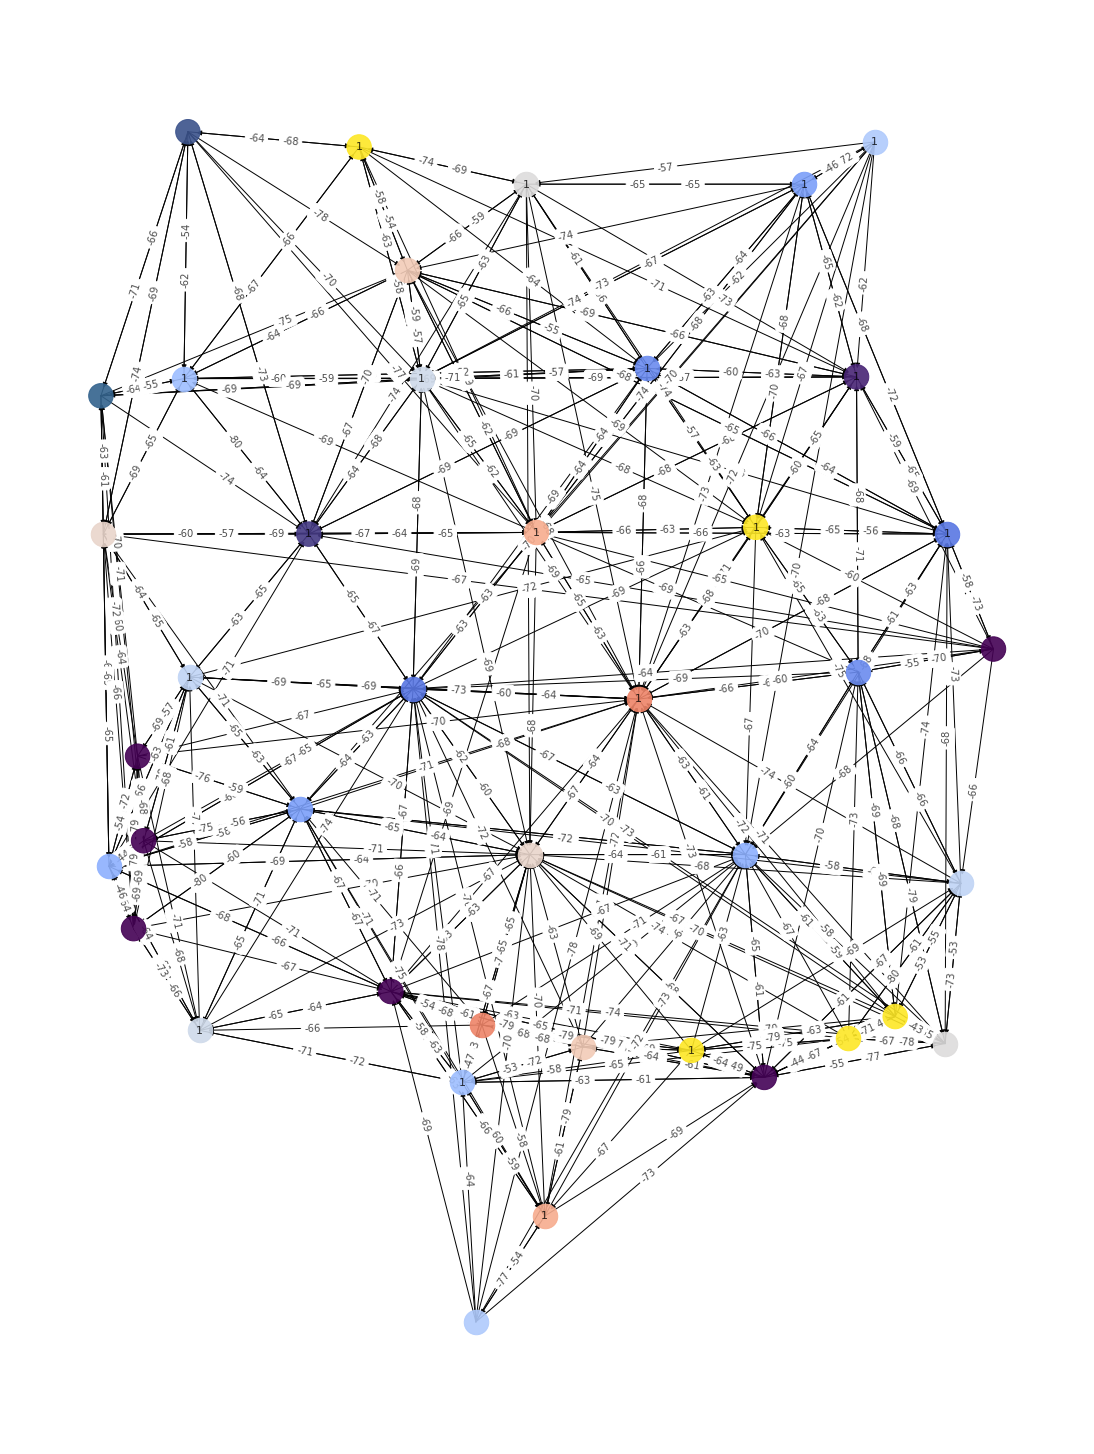

In [18]:
dirname = os.path.realpath("../../mist-rrm-exp/src") #os.path.dirname(os.path.realpath("../AP/"))

import sys
print(dirname)
if dirname not in sys.path:
    sys.path.insert(0, dirname)
    
    
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
from common import graphPlotHelper
reload(graphPlotHelper)
plt.figure(figsize=(15, 20))
graphPlotHelper.plotGraphColor(mist_g, {}, False, "anomaly")

# graphPlotHelper.plotGraphColorByMap(mist_g, {}, True, "anomaly")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

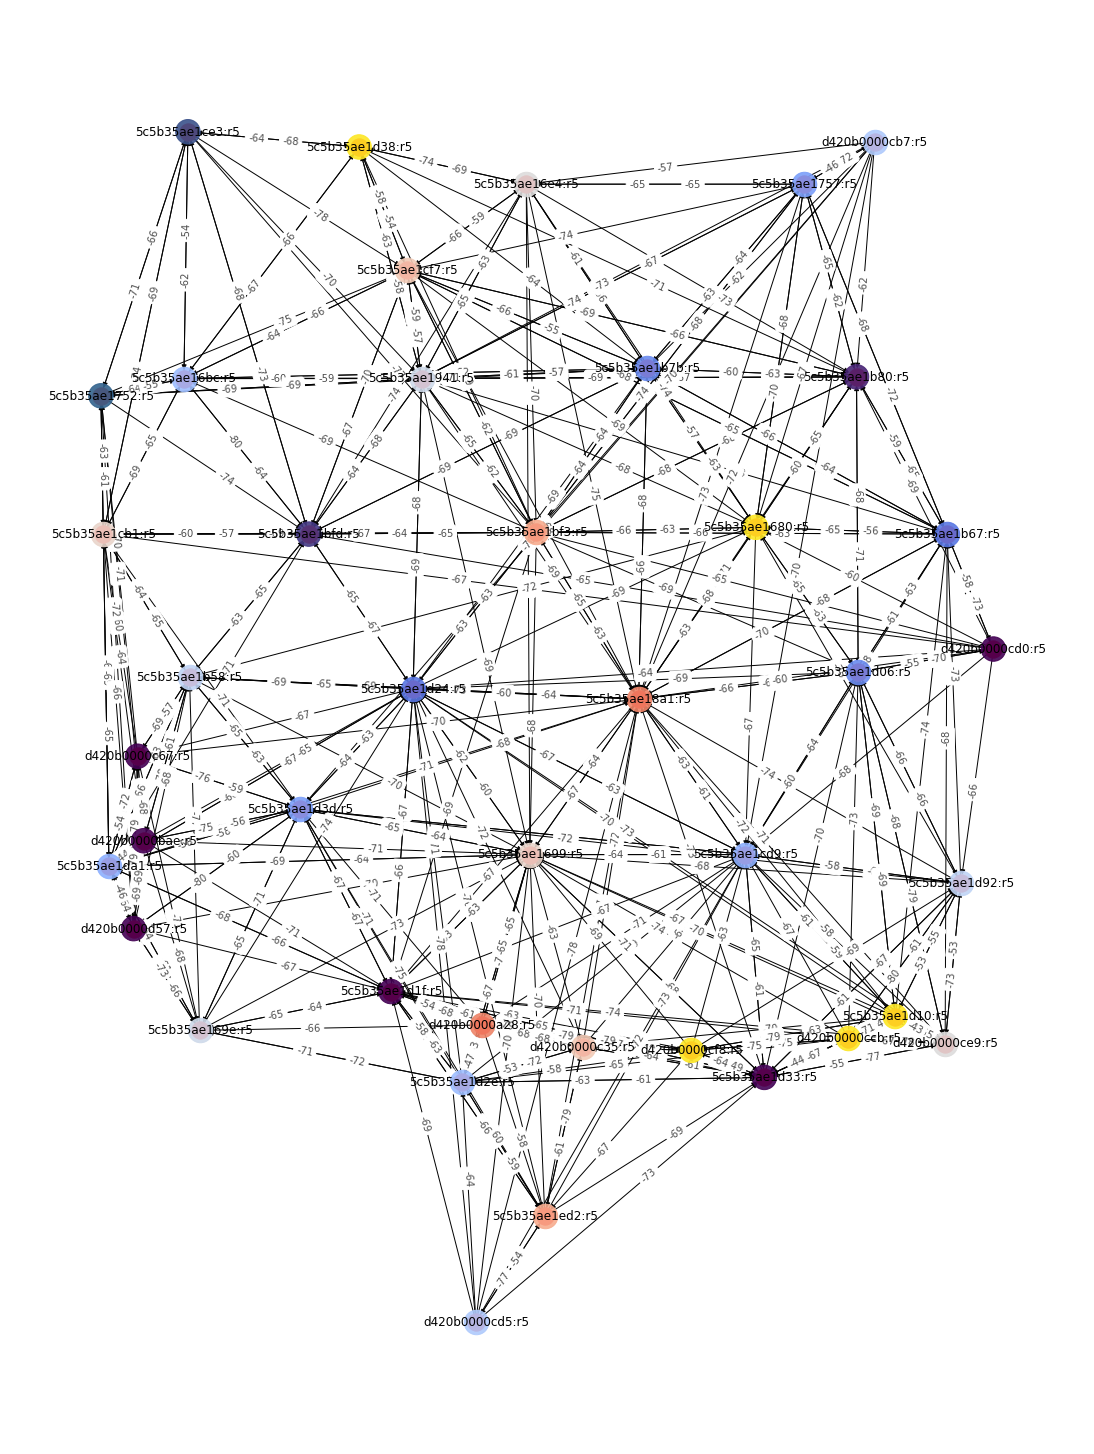

In [21]:
plt.figure(figsize=(15, 20))
graphPlotHelper.plotGraphColor(mist_g, {}, True, "ap")